In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from math import pi
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [3]:
table_2324 = pd.read_csv('2324.csv')

In [4]:

table_2324 = table_2324.sort_values('P', ascending = False)

In [5]:
table_2324.set_index('TEAM')

,GP,W,D,L,GF,GA,GD,P,GFPG,GAPG,PPG,OPPG,RTP,XG,XGA
TEAM,,,,,,,,,,,,,,,
LOBI STARS,10,6,2,2,14,9,5,20,1.400000,0.900000,2.000000,1.268889,2.537778,12.23,11.60
REMO STARS,10,6,1,3,16,11,5,19,1.600000,1.100000,1.900000,1.273889,2.420389,13.42,10.28
DOMA UNITED,10,5,3,2,10,5,5,18,1.000000,0.500000,1.800000,1.278889,2.302000,8.00,16.54
SHOOTING STARS,10,5,2,3,14,12,2,17,1.400000,1.200000,1.700000,1.283889,2.182611,12.46,11.64
ENYIMBA,10,5,1,4,8,8,0,16,0.800000,0.800000,1.600000,1.288889,2.062222,12.81,9.08
ENUGU RANGERS,10,4,3,3,15,11,4,15,1.500000,1.100000,1.500000,1.293889,1.940833,13.32,9.55
ABIA WARRIORS,10,5,0,5,9,11,-2,15,0.900000,1.100000,1.500000,1.293889,1.940833,13.71,10.70
BENDEL INSURANCE,10,3,5,2,7,5,2,14,0.700000,0.500000,1.400000,1.298889,1.818444,11.57,9.53
SUNSHINE STARS,10,3,4,3,13,13,0,13,1.300000,1.300000,1.300000,1.303889,1.695056,11.37,11.94


In [4]:
X = table_2324.drop(['TEAM','GP','W','L','D','OPPG','RTP'], axis = 1)
y = table_2324['P']
##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
###
###
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=38, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
#
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error (MSE): 3.444078947368424
R-squared (R2) Score: 0.443381180223285


In [5]:
exp_points = rf_model.predict(X) 
table_2324['exp_Points'] = exp_points + ((table_2324['PPG']) *(38 - table_2324['GP']))

In [6]:
table_2324

,TEAM,GP,W,D,L,GF,GA,GD,P,GFPG,GAPG,PPG,OPPG,RTP,XG,XGA,exp_Points
0,REMO STARS,9,5,1,3,15,11,4,16,1.666667,1.222222,1.777778,1.282778,2.280494,12.41,8.82,67.397661
1,LOBI STARS,10,6,2,2,14,9,5,20,1.400000,0.900000,2.000000,1.271667,2.543333,12.23,11.60,72.315789
2,ENUGU RANGERS,10,4,3,3,15,11,4,15,1.500000,1.100000,1.500000,1.296667,1.945000,13.32,9.55,57.210526
3,SHOOTING STARS,10,5,2,3,14,12,2,17,1.400000,1.200000,1.700000,1.286667,2.187333,12.46,11.64,64.284211
4,BENDEL INSURANCE,10,3,5,2,7,5,2,14,0.700000,0.500000,1.400000,1.301667,1.822333,11.57,9.53,52.857895
5,GOMBE UNITED,10,4,0,6,6,14,-8,12,0.600000,1.400000,1.200000,1.311667,1.574000,11.57,11.46,44.757895
6,NIGER TORNADOES,10,3,2,5,6,10,-4,11,0.600000,1.000000,1.100000,1.316667,1.448333,9.48,12.15,41.773684
7,PLATEAU UNITED,9,4,1,4,7,6,1,13,0.777778,0.666667,1.444444,1.299444,1.876975,12.67,8.67,55.099415
8,KANO PILLARS,10,4,1,5,7,10,-3,13,0.700000,1.000000,1.300000,1.306667,1.698667,11.83,10.04,49.400000
9,ABIA WARRIORS,10,5,0,5,9,11,-2,15,0.900000,1.100000,1.500000,1.296667,1.945000,13.71,10.70,57.052632


In [7]:
table_2324 = table_2324.sort_values('exp_Points', ascending=False)

In [8]:
table_2324

,TEAM,GP,W,D,L,GF,GA,GD,P,GFPG,GAPG,PPG,OPPG,RTP,XG,XGA,exp_Points
1,LOBI STARS,10,6,2,2,14,9,5,20,1.400000,0.900000,2.000000,1.271667,2.543333,12.23,11.60,72.315789
13,DOMA UNITED,10,5,3,2,10,5,5,18,1.000000,0.500000,1.800000,1.281667,2.307000,8.00,16.54,67.584211
0,REMO STARS,9,5,1,3,15,11,4,16,1.666667,1.222222,1.777778,1.282778,2.280494,12.41,8.82,67.397661
17,ENYIMBA,9,5,1,3,8,7,1,16,0.888889,0.777778,1.777778,1.282778,2.280494,11.35,8.07,67.134503
3,SHOOTING STARS,10,5,2,3,14,12,2,17,1.400000,1.200000,1.700000,1.286667,2.187333,12.46,11.64,64.284211
2,ENUGU RANGERS,10,4,3,3,15,11,4,15,1.500000,1.100000,1.500000,1.296667,1.945000,13.32,9.55,57.210526
9,ABIA WARRIORS,10,5,0,5,9,11,-2,15,0.900000,1.100000,1.500000,1.296667,1.945000,13.71,10.70,57.052632
7,PLATEAU UNITED,9,4,1,4,7,6,1,13,0.777778,0.666667,1.444444,1.299444,1.876975,12.67,8.67,55.099415
4,BENDEL INSURANCE,10,3,5,2,7,5,2,14,0.700000,0.500000,1.400000,1.301667,1.822333,11.57,9.53,52.857895
14,RIVERS UTD,9,3,3,3,7,6,1,12,0.777778,0.666667,1.333333,1.305000,1.740000,12.07,8.28,50.798246


In [9]:
pred_points = table_2324['P'] + ((table_2324['PPG']) *(38 - table_2324['GP']))
table_2324['Pred_P'] = pred_points
table_2324 = table_2324.sort_values('Pred_P', ascending=False)


In [10]:
table_2324

,TEAM,GP,W,D,L,GF,GA,GD,P,GFPG,GAPG,PPG,OPPG,RTP,XG,XGA,exp_Points,Pred_P
1,LOBI STARS,10,6,2,2,14,9,5,20,1.400000,0.900000,2.000000,1.271667,2.543333,12.23,11.60,72.315789,76.000000
13,DOMA UNITED,10,5,3,2,10,5,5,18,1.000000,0.500000,1.800000,1.281667,2.307000,8.00,16.54,67.584211,68.400000
0,REMO STARS,9,5,1,3,15,11,4,16,1.666667,1.222222,1.777778,1.282778,2.280494,12.41,8.82,67.397661,67.555556
17,ENYIMBA,9,5,1,3,8,7,1,16,0.888889,0.777778,1.777778,1.282778,2.280494,11.35,8.07,67.134503,67.555556
3,SHOOTING STARS,10,5,2,3,14,12,2,17,1.400000,1.200000,1.700000,1.286667,2.187333,12.46,11.64,64.284211,64.600000
2,ENUGU RANGERS,10,4,3,3,15,11,4,15,1.500000,1.100000,1.500000,1.296667,1.945000,13.32,9.55,57.210526,57.000000
9,ABIA WARRIORS,10,5,0,5,9,11,-2,15,0.900000,1.100000,1.500000,1.296667,1.945000,13.71,10.70,57.052632,57.000000
7,PLATEAU UNITED,9,4,1,4,7,6,1,13,0.777778,0.666667,1.444444,1.299444,1.876975,12.67,8.67,55.099415,54.888889
4,BENDEL INSURANCE,10,3,5,2,7,5,2,14,0.700000,0.500000,1.400000,1.301667,1.822333,11.57,9.53,52.857895,53.200000
14,RIVERS UTD,9,3,3,3,7,6,1,12,0.777778,0.666667,1.333333,1.305000,1.740000,12.07,8.28,50.798246,50.666667


In [35]:
X_GD = table_2324['XG'] - table_2324['XGA']
table_2324['XGD'] = X_GD
table_2324 = table_2324.sort_values('P', ascending=False)
table_2324

,TEAM,GP,W,D,L,GF,GA,GD,P,GFPG,GAPG,PPG,OPPG,RTP,XG,XGA,XGD
1,LOBI STARS,10,6,2,2,14,9,5,20,1.400000,0.900000,2.000000,1.271667,2.543333,12.23,11.60,0.63
13,DOMA UNITED,10,5,3,2,10,5,5,18,1.000000,0.500000,1.800000,1.281667,2.307000,8.00,16.54,-8.54
3,SHOOTING STARS,10,5,2,3,14,12,2,17,1.400000,1.200000,1.700000,1.286667,2.187333,12.46,11.64,0.82
0,REMO STARS,9,5,1,3,15,11,4,16,1.666667,1.222222,1.777778,1.282778,2.280494,12.41,8.82,3.59
17,ENYIMBA,9,5,1,3,8,7,1,16,0.888889,0.777778,1.777778,1.282778,2.280494,11.35,8.07,3.28
2,ENUGU RANGERS,10,4,3,3,15,11,4,15,1.500000,1.100000,1.500000,1.296667,1.945000,13.32,9.55,3.77
9,ABIA WARRIORS,10,5,0,5,9,11,-2,15,0.900000,1.100000,1.500000,1.296667,1.945000,13.71,10.70,3.01
4,BENDEL INSURANCE,10,3,5,2,7,5,2,14,0.700000,0.500000,1.400000,1.301667,1.822333,11.57,9.53,2.04
12,KWARA UTD,10,3,4,3,10,9,1,13,1.000000,0.900000,1.300000,1.306667,1.698667,10.88,12.93,-2.05
11,KATSINA UTD,10,3,4,3,8,8,0,13,0.800000,0.800000,1.300000,1.306667,1.698667,9.56,13.84,-4.28


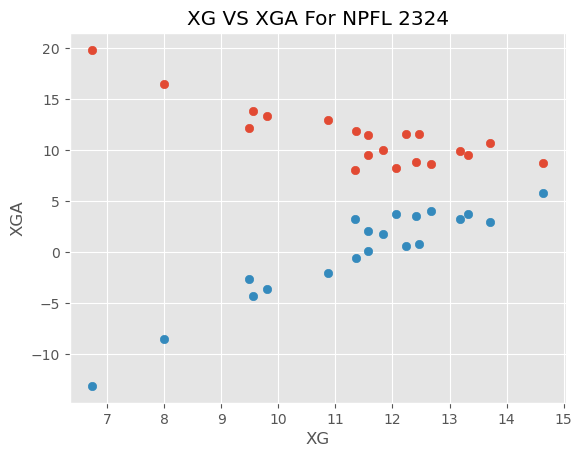

In [41]:
style.use('ggplot')
plt.scatter(table_2324['XG'],table_2324['XGA'])
plt.scatter(table_2324['XG'], table_2324['XGD'])


plt.xlabel('XG')
plt.ylabel('XGA')
plt.title('XG VS XGA For NPFL 2324')
plt.savefig('XG VS XGA For NPFL 2324')

In [43]:
G_XG = table_2324['GF'] - table_2324['XG']
GA_XGA = table_2324['XGA'] - table_2324['GA']
XG_GP = table_2324['XG']/table_2324['GP']
XGA_GP = table_2324['XGA']/table_2324['GP']

table_2324['G-XG'] = G_XG
table_2324['GA_XGA'] = GA_XGA
table_2324['XG/GP'] = XG_GP
table_2324['XGA/GP'] = XGA_GP

Rdar_2324 = table_2324.drop(['GP','W','L','D','GD','P','PPG','XGD','OPPG','RTP'], axis = 1)
Rdar_2324.set_index("TEAM", inplace=True)
Rdar_2324

,GF,GA,GFPG,GAPG,XG,XGA,G-XG,GA_XGA,XG/GP,XGA/GP
TEAM,,,,,,,,,,
LOBI STARS,14,9,1.400000,0.900000,12.23,11.60,1.77,2.60,1.223000,1.160000
DOMA UNITED,10,5,1.000000,0.500000,8.00,16.54,2.00,11.54,0.800000,1.654000
SHOOTING STARS,14,12,1.400000,1.200000,12.46,11.64,1.54,-0.36,1.246000,1.164000
REMO STARS,15,11,1.666667,1.222222,12.41,8.82,2.59,-2.18,1.378889,0.980000
ENYIMBA,8,7,0.888889,0.777778,11.35,8.07,-3.35,1.07,1.261111,0.896667
ENUGU RANGERS,15,11,1.500000,1.100000,13.32,9.55,1.68,-1.45,1.332000,0.955000
ABIA WARRIORS,9,11,0.900000,1.100000,13.71,10.70,-4.71,-0.30,1.371000,1.070000
BENDEL INSURANCE,7,5,0.700000,0.500000,11.57,9.53,-4.57,4.53,1.157000,0.953000
KWARA UTD,10,9,1.000000,0.900000,10.88,12.93,-0.88,3.93,1.088000,1.293000


In [50]:
Attributes =list(Rdar_2324)
AttNo = len(Attributes)

In [51]:
Avg_2324 = pd.DataFrame({'AVGGPG':np.mean(Rdar_2324['GFPG']) ,
                         'AVGGAPG': np.mean(Rdar_2324['GAPG']),
                         'AVGG':np.mean(Rdar_2324['GF']),
                         'AVGGA':np.mean(Rdar_2324['GA']),
                         'AVGXG': np.mean(Rdar_2324['XG']) ,
                         'AVGXGA':np.mean(Rdar_2324['XGA']),
                        'AVG_XG':np.mean(Rdar_2324['G-XG']),
                        'AVGA_XGA':np.mean(Rdar_2324['GA_XGA']),
                         'AVGXG/GP': np.mean(Rdar_2324['XG/GP']) ,
                         'AVGXGA/GP':np.mean(Rdar_2324['XGA/GP']),
                        'index':[0]})
Avg_2324.set_index("index", inplace=True)
Avg_2324

,AVGGPG,AVGGAPG,AVGG,AVGGA,AVGXG,AVGXGA,AVG_XG,AVGA_XGA,AVGXG/GP,AVGXGA/GP
index,,,,,,,,,,
0,1.000556,1.006667,9.8,9.9,11.4425,11.3855,-1.6425,1.4855,1.171194,1.15735


In [55]:
values = Rdar_2324.iloc[0].tolist()
values += values [:1]
values

[14.0,
 9.0,
 1.4,
 0.9,
 12.23,
 11.6,
 1.7699999999999996,
 2.5999999999999996,
 1.223,
 1.16,
 14.0]

In [56]:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

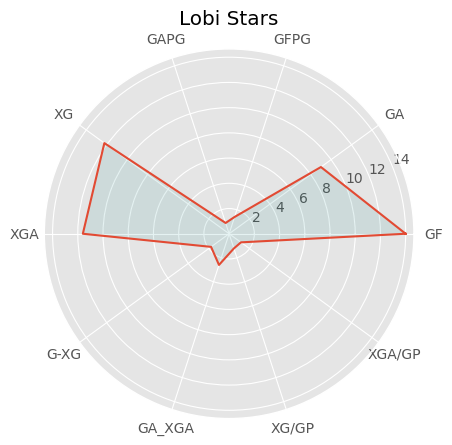

In [57]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title("Lobi Stars")
plt.show()

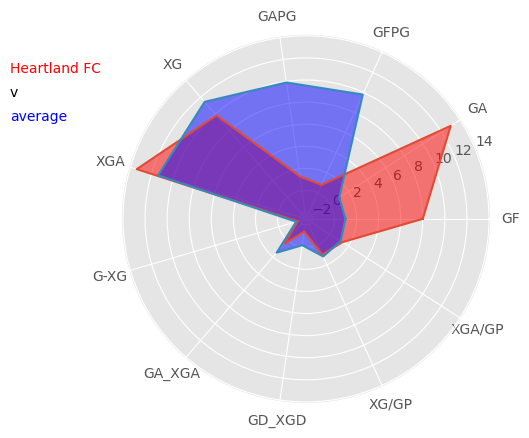

In [26]:
#Find the values and angles for Messi - from the table at the top of the page
values2 = Rdar_2324.iloc[19].tolist()
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

values3 = Avg_2324.iloc[0].tolist()
values3 += values3 [:1]

angles3 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles3 += angles3 [:1]

#Create the chart as before, but with both Ronaldo's and Messi's angles/values
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1],Attributes)

#ax.plot(angles,values)
#ax.fill(angles, values, 'b', alpha=0.1)

ax.plot(angles2,values2)
ax.fill(angles2, values2, 'r', alpha=0.5)

ax.plot(angles3,values3)
ax.fill(angles3, values3, 'b', alpha=0.5)

#Rather than use a title, individual text points are added
#plt.figtext(0.05,0.9,"Lobi Stars",color="red")
#plt.figtext(0.05,0.85,"v")
plt.figtext(0.05,0.8,"Heartland FC",color="r")
plt.figtext(0.05,0.75,"v")
plt.figtext(0.05,0.70,'average', color='b')
plt.savefig('HEARTLAND FC VS THE REST')
plt.show()
